In [1]:
# Importing OpenCV library
import cv2

In [3]:
# Load an image from file 
image = cv2.imread('pika wallpaper.webp') 

output_image_path = 'gray_pika_wallpaper.png'  # Path to save grayscale image

# Check if the image loaded successfully
if image is None:
    print("Error: Could not open or find the image.")
else:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Save the grayscale image
    cv2.imwrite(output_image_path, gray_image)
    print(f"Grayscale image saved as {output_image_path}")
    
    # Resize images for better display if too large
    max_width = 800
    scale = 1.0
    if image.shape[1] > max_width:
        scale = max_width / image.shape[1]
        image_resized = cv2.resize(image, (int(image.shape[1]*scale), int(image.shape[0]*scale)))
        gray_resized = cv2.resize(gray_image, (int(gray_image.shape[1]*scale), int(gray_image.shape[0]*scale)))
    else:
        image_resized = image
        gray_resized = gray_image
    
    # Display the original and grayscale images (resized)
    cv2.imshow('Original Image (Resized)', image_resized)
    cv2.imshow('Grayscale Image (Resized)', gray_resized)
    
    # Wait indefinitely for a key press
    cv2.waitKey(0)
    
    # Destroy all windows after key press
    cv2.destroyAllWindows()

Grayscale image saved as gray_pika_wallpaper.png


# Computer Vision OpenCV Tasks

This notebook demonstrates the following tasks using OpenCV:

1. Read and display an image in color and grayscale.
2. Resize and rotate an image.
3. Convert an image from RGB to HSV and Grayscale.
4. Draw basic shapes (line, rectangle, circle) and add text on an image.
5. Flip (horizontal/vertical) and crop a region of interest (ROI) from an image.

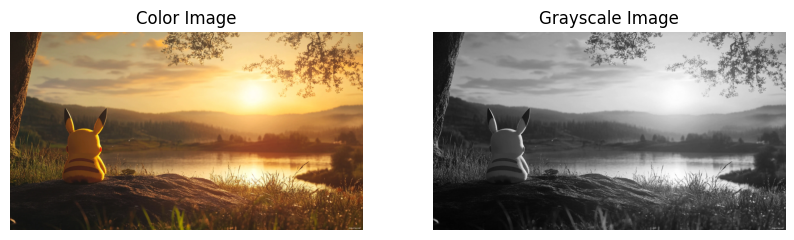

In [4]:
# 1. Read and display an image in color and grayscale
import cv2
from matplotlib import pyplot as plt

# Read the image in color
image = cv2.imread('pika wallpaper.webp')
if image is None:
    print("Error: Could not open or find the image.")
else:
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Display using matplotlib for notebook compatibility
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Color Image')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    plt.show()
    # Save grayscale image
    cv2.imwrite('gray_pika_wallpaper.png', gray_image)

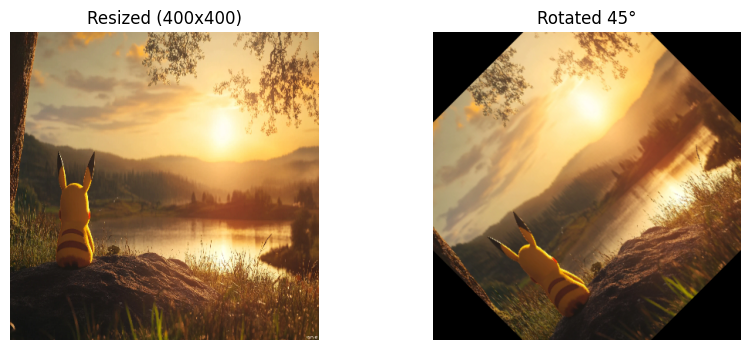

In [5]:
# 2. Resize and rotate an image
import numpy as np

# Resize image to 400x400 and rotate by 45 degrees
if image is not None:
    resized = cv2.resize(image, (400, 400))
    # Rotation
    center = (200, 200)
    angle = 45
    scale = 1.0
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(resized, M, (400, 400))
    # Display
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
    plt.title('Resized (400x400)')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    plt.title('Rotated 45°')
    plt.axis('off')
    plt.show()

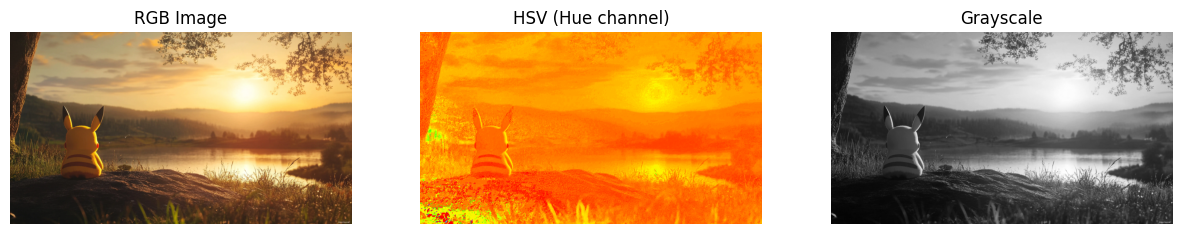

In [6]:
# 3. Convert an image from RGB to HSV and Grayscale
if image is not None:
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('RGB Image')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(hsv_image[:,:,0], cmap='hsv')
    plt.title('HSV (Hue channel)')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')
    plt.show()

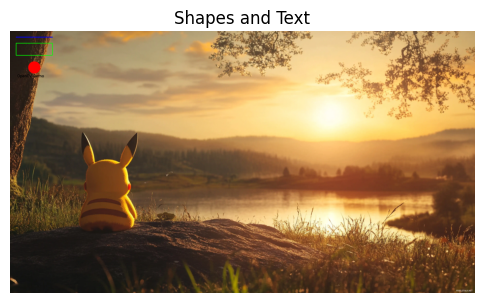

In [7]:
# 4. Draw basic shapes and add text on an image
if image is not None:
    img_shapes = image.copy()
    # Draw a blue line
    cv2.line(img_shapes, (50, 50), (350, 50), (255, 0, 0), 5)
    # Draw a green rectangle
    cv2.rectangle(img_shapes, (50, 100), (350, 200), (0, 255, 0), 3)
    # Draw a red circle
    cv2.circle(img_shapes, (200, 300), 50, (0, 0, 255), -1)
    # Add text
    cv2.putText(img_shapes, 'OpenCV Demo', (60, 380), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv2.LINE_AA)
    # Display
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img_shapes, cv2.COLOR_BGR2RGB))
    plt.title('Shapes and Text')
    plt.axis('off')
    plt.show()

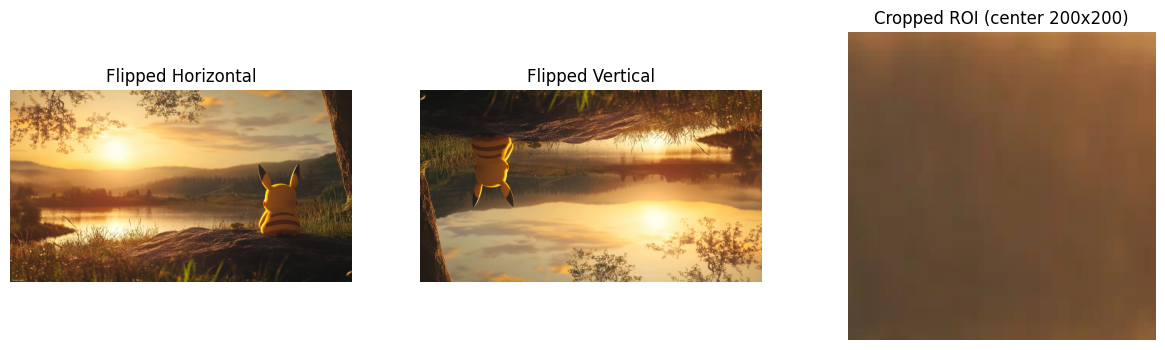

In [8]:
# 5. Flip (horizontal/vertical) and crop a region of interest (ROI) from an image
if image is not None:
    # Flip horizontally and vertically
    flip_h = cv2.flip(image, 1)
    flip_v = cv2.flip(image, 0)
    # Crop ROI (center 200x200 region)
    h, w = image.shape[:2]
    x, y = w//2 - 100, h//2 - 100
    roi = image[y:y+200, x:x+200]
    # Display
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(flip_h, cv2.COLOR_BGR2RGB))
    plt.title('Flipped Horizontal')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(cv2.cvtColor(flip_v, cv2.COLOR_BGR2RGB))
    plt.title('Flipped Vertical')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.title('Cropped ROI (center 200x200)')
    plt.axis('off')
    plt.show()